# Download GWAS catalog and map variants to genes using OTG V2G

In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import sys

In [2]:
from genetics import Genetics

api = Genetics()

In [3]:
otg_info = pd.read_pickle('data/info.pkl')
otg_info

,traitReported,source,traitEfos,pmid,pubDate,pubJournal,pubTitle,pubAuthor,hasSumstats,ancestryInitial,...,nInitial,nReplication,nCases,traitCategory,numAssocLoci,nTotal,bestLocus2GenesOrClosest_id,bestLocus2GenesOrClosest_symbol,variant_gene_id_pairs,variant_gene_symbol_pairs
studyId,,,,,,,,,,,,,,,,,,,,,
FINNGEN_R5_AB1_BACTINF_NOS,"Bacterial infection, other or unspecified",FINNGEN,[EFO_0000771],None,2021-05-11,None,None,FINNGEN_R5,True,[European=218637],...,218637,0,20977,infectious disease,2,218637,"(ENSG00000132693, ENSG00000118922)","(CRP, KLF12)","(((ENSG00000132693,), 1_159743672_A_G), ((ENSG...","(((CRP,), 1_159743672_A_G), ((KLF12,), 13_7429..."
FINNGEN_R5_AB1_DERMATOPHYTOSIS,Dermatophytosis,FINNGEN,[MONDO_0004678],None,2021-05-11,None,None,FINNGEN_R5,True,[European=216472],...,216472,0,1656,infectious disease,1,216472,"(ENSG00000118434,)","(SPACA1,)","(((ENSG00000118434,), 6_87971973_T_C),)","(((SPACA1,), 6_87971973_T_C),)"
FINNGEN_R5_AB1_EBV,Infectious mononucleosis,FINNGEN,[EFO_0007326],None,2021-05-11,None,None,FINNGEN_R5,True,[European=214904],...,214904,0,1238,infectious disease,1,214904,"(ENSG00000268043,)","(NBPF12,)","(((ENSG00000268043,), 1_147027146_G_A),)","(((NBPF12,), 1_147027146_G_A),)"
FINNGEN_R5_AB1_GASTROENTERITIS_NOS,Diarrhoea and gastroenteritis of presumed infe...,FINNGEN,[MONDO_0045031],None,2021-05-11,None,None,FINNGEN_R5,True,[European=212553],...,212553,0,15255,infectious disease,1,212553,"(ENSG00000178764,)","(ZHX2,)","(((ENSG00000178764,), 8_122593984_C_T),)","(((ZHX2,), 8_122593984_C_T),)"
FINNGEN_R5_AB1_GHLAMY_OTHER,Other diseases caused by chlamydiae,FINNGEN,[EFO_1001288],None,2021-05-11,None,None,FINNGEN_R5,True,[European=218772],...,218772,0,167,infectious disease,1,218772,"(ENSG00000112818, ENSG00000069122)","(MEP1A, ADGRF5)","(((ENSG00000112818, ENSG00000069122), 6_468771...","(((MEP1A, ADGRF5), 6_46877116_T_G),)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAIGE_960_2,Allergy/adverse effect of penicillin,SAIGE,[EFO_0008546],None,2018-10-24,None,None,UKB SAIGE,True,[European=397887],...,397887,0,16090,"injury, poisoning or other complication",1,397887,"(ENSG00000188981,)","(MSANTD1,)","(((ENSG00000188981,), 4_3240118_C_T),)","(((MSANTD1,), 4_3240118_C_T),)"
SAIGE_965,"Poisoning by analgesics, antipyretics, and ant...",SAIGE,[EFO_0008546],None,2018-10-24,None,None,UKB SAIGE,True,[European=388707],...,388707,0,6910,"injury, poisoning or other complication",1,388707,"(ENSG00000145839,)","(IL9,)","(((ENSG00000145839,), 5_135834716_T_G),)","(((IL9,), 5_135834716_T_G),)"
SAIGE_965_1,Opiates and related narcotics causing adverse ...,SAIGE,[EFO_0009658],None,2018-10-24,None,None,UKB SAIGE,True,[European=382947],...,382947,0,1150,"injury, poisoning or other complication",1,382947,"(ENSG00000152495,)","(CAMK4,)","(((ENSG00000152495,), 5_111211885_A_G),)","(((CAMK4,), 5_111211885_A_G),)"


In [4]:
otg_info.loc['GCST006585']

traitReported                                Blood protein levels [A1CF, 12423_38_3]
source                                                                          GCST
traitEfos                                                              [EFO_0007937]
pmid                                                                   PMID:30072576
pubDate                                                                   2018-08-02
pubJournal                                                                   Science
pubTitle                           Co-regulatory networks of human serum proteins...
pubAuthor                                                                 Emilsson V
hasSumstats                                                                    False
ancestryInitial                                                      [European=3200]
ancestryReplication                                                               []
nInitial                                                         

## Download GWAS catalog from EBI and exclude studies that are already processed by OTG

In [5]:
pd.options.display.max_columns = None

In [6]:
ebi = pd.read_table('https://www.ebi.ac.uk/gwas/api/search/downloads/alternative')
ebi = ebi[~ebi['STUDY ACCESSION'].isin(otg_info.index.values)].sort_values('DATE ADDED TO CATALOG').set_index('STUDY ACCESSION')
ebi = ebi[~ebi['PUBMEDID'].isin(['29875488', '28915241', '28369058', '27532455'])] ## remove blood protein levels
ebi = ebi[ebi['P-VALUE'].astype(float) <= 5e-8]
ebi['MAPPED_TRAIT'] = [f'{x[0].upper()}{x[1:]}' if not pd.isna(x) else x for x in ebi['MAPPED_TRAIT']]

ebi

/home/gokcen/.miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,REGION,CHR_ID,CHR_POS,REPORTED GENE(S),MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,STRONGEST SNP-RISK ALLELE,SNPS,MERGED,SNP_ID_CURRENT,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,GENOTYPING TECHNOLOGY
STUDY ACCESSION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,"1,200 European ancestry individuals","up to 4,590 European ancestry individuals",17q12,17,36463349,CCL4L2,TBC1D3J - ZNHIT3,ENSG00000282656,ENSG00000273611,NaN,5814.0,23280.0,rs4796217-?,rs4796217,0,4796217.0,regulatory_region_variant,1.0,0.34,4.000000e-21,20.397940,(MIPb),NaN,NaN,Illumina [496032],N,CCL4 measurement,http://www.ebi.ac.uk/efo/EFO_0004751,Genome-wide genotyping array
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,"1,200 European ancestry individuals","up to 4,590 European ancestry individuals",6q25.3,6,160597142,LPA,LPA,NaN,NaN,ENSG00000198670,NaN,NaN,rs7770628-?,rs7770628,0,7770628.0,intron_variant,0.0,0.49,4.000000e-10,9.397940,(LPA),NaN,NaN,Illumina [496032],N,Apolipoprotein A 1 measurement,http://www.ebi.ac.uk/efo/EFO_0004614,Genome-wide genotyping array
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,"1,200 European ancestry individuals","up to 4,590 European ancestry individuals",9q34.2,9,133273813,ABO,"ABO, ABO",NaN,NaN,"ENSG00000175164, ENSG00000281879",NaN,NaN,rs505922-?,rs505922,0,505922.0,intron_variant,0.0,0.34,7.000000e-40,39.154902,(TNFA),NaN,NaN,Illumina [496032],N,Tumor necrosis factor-alpha measurement,http://www.ebi.ac.uk/efo/EFO_0004684,Genome-wide genotyping array
GCST000184,2008-06-22,18454146,Chambers JC,2008-05-04,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18454146,Common genetic variation near MC4R is associat...,Waist circumference and related phenotypes,"2,684 Indian Asian ancestry male individuals","7,394 Indian Asian ancestry individuals, 4,561...",16q13,16,56959412,CETP,HERPUD1 - CETP,ENSG00000051108,ENSG00000087237,NaN,14548.0,2511.0,rs3764261-?,rs3764261,0,3764261.0,regulatory_region_variant,1.0,NR,1.000000e-27,27.000000,(HDL cholesterol),NaN,NaN,Illumina [308067],N,High density lipoprotein cholesterol measurement,http://www.ebi.ac.uk/efo/EFO_0004612,Genome-wide genotyping array
GCST000184,2008-06-22,18454146,Chambers JC,2008-05-04,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18454146,Common genetic variation near MC4R is associat...,Waist circumference and related phenotypes,"2,684 Indian Asian ancestry male individuals","7,394 Indian Asian ancestry individuals, 4,561...",2p23.3,2,27508073,GCKR,GCKR,NaN,NaN,ENSG00000084734,NaN,NaN,rs1260326-?,rs1260326,0,1260326.0,missense_variant,0.0,NR,4.000000e-08,7.397940,(triglycerides),NaN,NaN,Illumina [308067],N,Triglyceride measurement,http://www.ebi.ac.uk/efo/EFO_0004530,Genome-wide genotyping array
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCST012179,2021-08-13,34302048,Qu HQ,2021-07-23,Commun Biol,www.ncbi.nlm.nih.gov/pubmed/34302048,Genetic architecture of type 1 diabetes with l...,Type 1 diabetes,"6,599 European ancestry cases, 12,323 European...",NaN,NaN,NaN,NaN,NR,NaN,NaN,NaN,NaN,NaN,NaN,chr8:56693303-ATT,chr8:56693303,0,NaN,NaN,1.0,NR,4.000000e-10,9.397940,NaN,1.2190,[1.146-1.297],Illumina [104689647] (imputed),N,Type I diabetes mellitus,http

In [7]:
ebi_studies = pd.read_table('https://www.ebi.ac.uk/gwas/api/search/downloads/studies')
ebi_studies

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,PLATFORM [SNPS PASSING QC],ASSOCIATION COUNT
0,2008-09-12,18391950,Lettre G,2008-04-06,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18391950,Identification of ten loci associated with hei...,Height,"15,821 European ancestry individuals","Up to 17,801 European ancestry individuals","Affymetrix, Illumina [2260683] (imputed)",18
1,2008-07-01,18391951,Gudbjartsson DF,2008-04-06,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18391951,Many sequence variants affecting diversity of ...,Height,"30,968 European ancestry individuals","8,541 European ancestry individuals","Affymetrix, Illumina [up to 304226]",52
2,2009-02-27,19136949,Carrasquillo MM,2009-01-11,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/19136949,Genetic variation in PCDH11X is associated wit...,Alzheimer's disease,"844 European ancestry cases, 1,255 European an...","1,547 European ancestry cases, 1,209 European ...",Illumina [313504],1
3,2008-06-16,18385738,Hung RJ,2008-04-03,Nature,www.ncbi.nlm.nih.gov/pubmed/18385738,A susceptibility locus for lung cancer maps to...,Lung cancer,"1,926 European ance other ancestry cases, 2,52...","332 European ancestry cases, 462 European ance...",Illumina [310023],1
4,2008-06-16,18385676,Amos CI,2008-04-03,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18385676,Genome-wide association scan of tag SNPs ident...,Lung cancer,"1,154 European ancestry cases, 1,137 European ...","2,724 European ancestry cases, 3,694 European ...",Illumina [317498],3
...,...,...,...,...,...,...,...,...,...,...,...,...
18754,2019-02-08,30595370,Kichaev G,2018-12-27,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/30595370,Leveraging Polygenic Functional Enrichment to ...,Hair color,"approximately 452,000 European ancestry indivi...",NaN,NR [~ 8900000] (imputed),449
18755,2019-02-08,30595370,Kichaev G,2018-12-27,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/30595370,Leveraging Polygenic Functional Enrichment to ...,Morning person,"approximately 410,000 European ancestry indivi...",NaN,NR [~ 8900000] (imputed),168
18756,2019-02-08,30595370,Kichaev G,2018-12-27,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/30595370,Leveraging Polygenic Functional Enrichment to ...,Neuroticism,"approximately 372,000 European ancestry indivi...",NaN,NR [~ 8900000] (imputed),147
18757,2019-02-08,30595370,Kichaev G,2018-12-27,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/30595370,Leveraging Polygenic Functional Enrichment to ...,Smoking status,"approximately 458,000 European ancestry indivi...",NaN,NR [~ 8900000] (imputed),181


In [8]:
ebi = ebi.reset_index().merge(ebi_studies, how='left').set_index('STUDY ACCESSION')

In [9]:
ebi.head(3)

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,REGION,CHR_ID,CHR_POS,REPORTED GENE(S),MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,STRONGEST SNP-RISK ALLELE,SNPS,MERGED,SNP_ID_CURRENT,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,GENOTYPING TECHNOLOGY,ASSOCIATION COUNT
STUDY ACCESSION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,"1,200 European ancestry individuals","up to 4,590 European ancestry individuals",17q12,17,36463349,CCL4L2,TBC1D3J - ZNHIT3,ENSG00000282656,ENSG00000273611,NaN,5814.0,23280.0,rs4796217-?,rs4796217,0,4796217.0,regulatory_region_variant,1.0,0.34,4.000000e-21,20.397940,(MIPb),NaN,NaN,Illumina [496032],N,CCL4 measurement,http://www.ebi.ac.uk/efo/EFO_0004751,Genome-wide genotyping array,49
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,"1,200 European ancestry individuals","up to 4,590 European ancestry individuals",6q25.3,6,160597142,LPA,LPA,NaN,NaN,ENSG00000198670,NaN,NaN,rs7770628-?,rs7770628,0,7770628.0,intron_variant,0.0,0.49,4.000000e-10,9.397940,(LPA),NaN,NaN,Illumina [496032],N,Apolipoprotein A 1 measurement,http://www.ebi.ac.uk/efo/EFO_0004614,Genome-wide genotyping array,49
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,"1,200 European ancestry individuals","up to 4,590 European ancestry individuals",9q34.2,9,133273813,ABO,"ABO, ABO",NaN,NaN,"ENSG00000175164, ENSG00000281879",NaN,NaN,rs505922-?,rs505922,0,505922.0,intron_variant,0.0,0.34,7.000000e-40,39.154902,(TNFA),NaN,NaN,Illumina [496032],N,Tumor necrosis factor-alpha measurement,http://www.ebi.ac.uk/efo/EFO_0004684,Genome-wide genotyping array,49


In [10]:
ebi.index.nunique()

873

In [11]:
ebi.columns

Index(['DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 'DATE', 'JOURNAL',
       'LINK', 'STUDY', 'DISEASE/TRAIT', 'INITIAL SAMPLE SIZE',
       'REPLICATION SAMPLE SIZE', 'REGION', 'CHR_ID', 'CHR_POS',
       'REPORTED GENE(S)', 'MAPPED_GENE', 'UPSTREAM_GENE_ID',
       'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS', 'UPSTREAM_GENE_DISTANCE',
       'DOWNSTREAM_GENE_DISTANCE', 'STRONGEST SNP-RISK ALLELE', 'SNPS',
       'MERGED', 'SNP_ID_CURRENT', 'CONTEXT', 'INTERGENIC',
       'RISK ALLELE FREQUENCY', 'P-VALUE', 'PVALUE_MLOG', 'P-VALUE (TEXT)',
       'OR or BETA', '95% CI (TEXT)', 'PLATFORM [SNPS PASSING QC]', 'CNV',
       'MAPPED_TRAIT', 'MAPPED_TRAIT_URI', 'GENOTYPING TECHNOLOGY',
       'ASSOCIATION COUNT'],
      dtype='object')

## Convert rsids in GWAS catalog to OTG variant IDs

In [12]:
rs = ebi['STRONGEST SNP-RISK ALLELE'].unique()
rs = [x.split('-')[0].strip() for x in rs if x.strip().startswith('rs')]
rs = [x for x in rs if 'x' not in x]
rs = sorted(list(set(rs)))
rs = [x for x in rs if x.isalnum()]

In [13]:
len(rs)

15722

In [14]:
rs_chunk = np.array_split(rs, len(rs)//100)

In [15]:
import time

dfs = []
for r in tqdm(rs_chunk):
    dfs.append(api.search_rsid(r))
    time.sleep(0.1)

  0%|          | 0/157 [00:00<?, ?it/s]

In [16]:
otg_df = pd.concat(dfs, axis=0).reset_index(drop=True)
otg_df = otg_df[~otg_df['id'].isnull()]
otg_df['CHR_ID'] = [x.split('_')[0] for x in otg_df['id']]
otg_df['CHR_POS'] = [x.split('_')[1] for x in otg_df['id']]
otg_df = otg_df.drop_duplicates()

In [17]:
otg_df

,id,rsid,CHR_ID,CHR_POS
0,4_68885967_A_G,rs10001501,4,68885967
1,20_21252560_T_C,rs1000177,20,21252560
2,4_164159753_A_G,rs10002082,4,164159753
3,2_186921772_G_T,rs1000624,2,186921772
4,6_85423118_A_G,rs1000632,6,85423118
...,...,...,...,...
16436,4_76519861_A_G,rs9996493,4,76519861
16437,4_75927078_C_T,rs9996608,4,75927078
16438,4_8172158_T_A,rs9996856,4,8172158
16439,4_6281526_T_C,rs9997824,4,6281526


## Find V2G scores for mapped variants

In [18]:
variants = otg_df['id'].unique()
variants_chunk = np.array_split(variants, len(variants)//8)

In [19]:
import time

In [20]:
variant_dfs = []

for r in tqdm(variants_chunk):
    variant_dfs.append(api.genes_for_variant(r))
    time.sleep(0.03)

  0%|          | 0/1977 [00:00<?, ?it/s]

In [21]:
variant_df = pd.concat(variant_dfs, axis=0)

In [22]:
variant_df.reset_index(drop=True, inplace=True)

In [23]:
variant_df.head()

,variant,overallScore,qtls,intervals,functionalPredictions,distances,gene_id,gene_symbol,gene_bioType,gene_description,gene_chromosome,gene_tss,gene_start,gene_end,gene_fwdStrand,gene_exons
0,4_68885967_A_G,0.090659,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000272626,AC021146.12,lincRNA,novel transcript,4,68906983,68901008,68906983,False,"[68901008, 68901375, 68906875, 68906983]"
1,4_68885967_A_G,0.081593,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000109181,UGT2B10,protein_coding,UDP glucuronosyltransferase family 2 member B1...,4,68815994,68815994,68832023,True,"[68830600, 68832023, 68818029, 68818177, 68815..."
2,4_68885967_A_G,0.063462,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000171234,UGT2B7,protein_coding,UDP glucuronosyltransferase family 2 member B7...,4,69051363,69051363,69112987,True,"[69112457, 69112987, 69108103, 69108322, 69107..."
3,4_68885967_A_G,0.045330,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000250696,AC111000.4,antisense,"novel transcript, antisense to UGT2B11",4,69182100,69182100,69216766,True,"[69214473, 69216766, 69211066, 69211147, 69201..."
4,4_68885967_A_G,0.081593,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000135220,UGT2A3,protein_coding,UDP glucuronosyltransferase family 2 member A3...,4,68951804,68928463,68951804,False,"[68928463, 68930092, 68930546, 68930765, 68931..."


<AxesSubplot:>

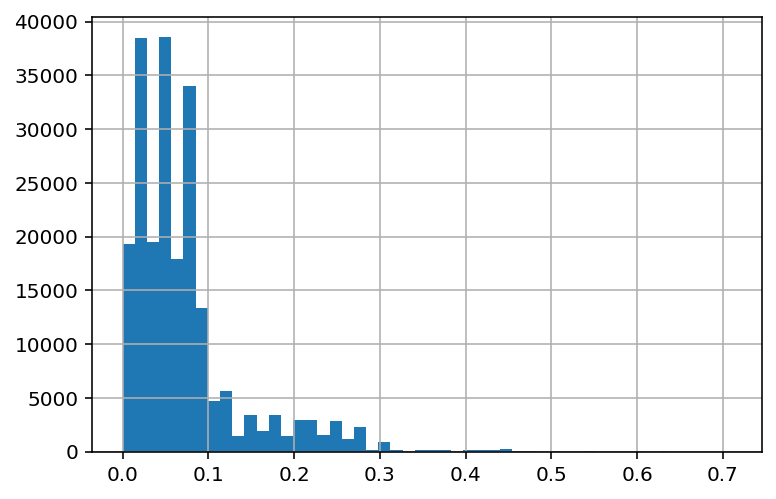

In [24]:
variant_df[variant_df.gene_bioType == 'protein_coding'].overallScore.hist(bins=50)

<AxesSubplot:>

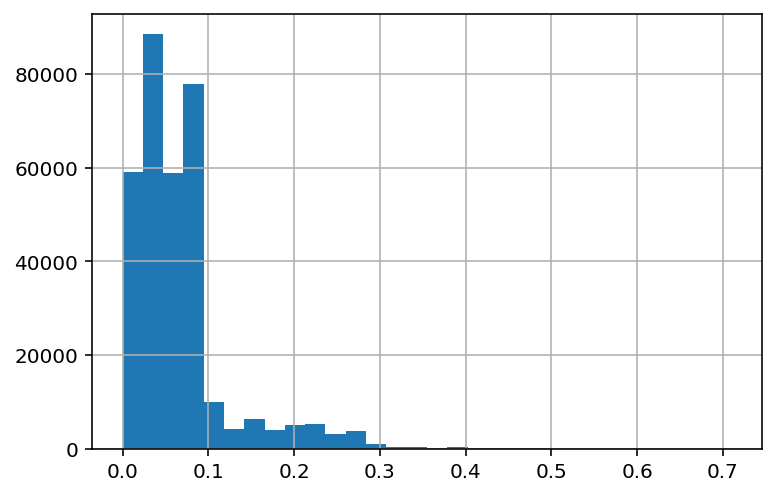

In [25]:
variant_df.overallScore.hist(bins=30)

In [26]:
variant_df.overallScore

0         0.090659
1         0.081593
2         0.063462
3         0.045330
4         0.081593
            ...   
328448    0.045330
328449    0.063462
328450    0.099725
328451    0.027198
328452    0.172527
Name: overallScore, Length: 328453, dtype: float64

In [27]:
variant_df[variant_df.gene_bioType == 'protein_coding'].overallScore.mean()

0.07258855027114584

In [28]:
from scipy.stats import beta

a, b, loc, scale = beta.fit(variant_df[variant_df.gene_bioType == 'protein_coding'].overallScore.values, loc=0.1)
a,b,loc,scale

/home/gokcen/.miniconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gokcen/.miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(2.132728249844492,
 436829336458.10986,
 -0.0019840932247950473,
 14144717874.142258)

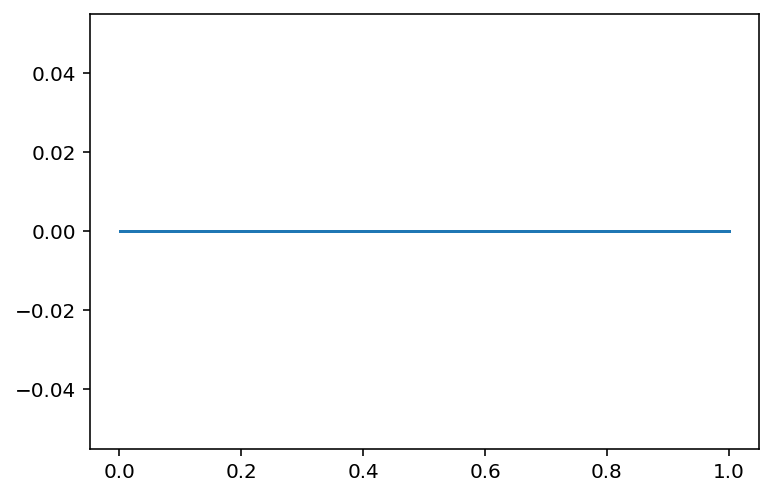

In [29]:
import matplotlib.pyplot as plt

x = np.linspace(1e-3, 1, 1000)
plt.plot(x, beta.pdf(x, a, b))

In [30]:
beta.ppf(0.75, a, b)

6.544209618652985e-12

In [31]:
beta.cdf(0.2, a, b)

0.9999999999999999

In [32]:
variant_df

,variant,overallScore,qtls,intervals,functionalPredictions,distances,gene_id,gene_symbol,gene_bioType,gene_description,gene_chromosome,gene_tss,gene_start,gene_end,gene_fwdStrand,gene_exons
0,4_68885967_A_G,0.090659,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000272626,AC021146.12,lincRNA,novel transcript,4,68906983,68901008,68906983,False,"[68901008, 68901375, 68906875, 68906983]"
1,4_68885967_A_G,0.081593,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000109181,UGT2B10,protein_coding,UDP glucuronosyltransferase family 2 member B1...,4,68815994,68815994,68832023,True,"[68830600, 68832023, 68818029, 68818177, 68815..."
2,4_68885967_A_G,0.063462,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000171234,UGT2B7,protein_coding,UDP glucuronosyltransferase family 2 member B7...,4,69051363,69051363,69112987,True,"[69112457, 69112987, 69108103, 69108322, 69107..."
3,4_68885967_A_G,0.045330,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000250696,AC111000.4,antisense,"novel transcript, antisense to UGT2B11",4,69182100,69182100,69216766,True,"[69214473, 69216766, 69211066, 69211147, 69201..."
4,4_68885967_A_G,0.081593,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000135220,UGT2A3,protein_coding,UDP glucuronosyltransferase family 2 member A3...,4,68951804,68928463,68951804,False,"[68928463, 68930092, 68930546, 68930765, 68931..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328448,4_79297258_T_C,0.045330,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000251399,AC092542.1,lincRNA,novel transcript,4,79596542,79596542,79597173,True,"[79596877, 79597173, 79596542, 79596599]"
328449,4_79297258_T_C,0.063462,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000250334,LINC00989,lincRNA,long intergenic non-protein coding RNA 989 [So...,4,79492416,79492416,79576460,True,"[79575141, 79576460, 79513785, 79513902, 79493..."
328450,4_79297258_T_C,0.099725,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000163291,PAQR3,protein_coding,progestin and adipoQ receptor family member 3 ...,4,78939438,78887127,78939438,False,"[78911878, 78920681, 78923857, 78923947, 78926..."
328451,4_79297258_T_C,0.027198,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000248408,LINC02469,lincRNA,long intergenic non-protein coding RNA 2469 [S...,4,79663761,79663761,79696837,True,"[79696413, 79696837, 79689988, 79690076, 79667..."


In [33]:
variant_df.loc[variant_df.overallScore.idxmax()]

variant                                                19_51225847_CCCGG_C
overallScore                                                       0.70989
qtls                     [{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...
intervals                                                               []
functionalPredictions    [{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...
distances                [{'typeId': 'distance', 'sourceId': 'canonical...
gene_id                                                    ENSG00000105383
gene_symbol                                                           CD33
gene_bioType                                                protein_coding
gene_description          CD33 molecule [Source:HGNC Symbol;Acc:HGNC:1659]
gene_chromosome                                                         19
gene_tss                                                          51225064
gene_start                                                        51225064
gene_end                 

In [34]:
variant_df[variant_df.gene_bioType=='protein_coding'][['variant', 'overallScore', 'gene_symbol', 'gene_bioType']].head(20)

,variant,overallScore,gene_symbol,gene_bioType
1,4_68885967_A_G,0.081593,UGT2B10,protein_coding
2,4_68885967_A_G,0.063462,UGT2B7,protein_coding
4,4_68885967_A_G,0.081593,UGT2A3,protein_coding
5,4_68885967_A_G,0.036264,UGT2B11,protein_coding
6,4_68885967_A_G,0.054396,UGT2B15,protein_coding
7,4_68885967_A_G,0.018132,TMPRSS11E,protein_coding
8,4_68885967_A_G,0.027198,UGT2B28,protein_coding
9,4_68885967_A_G,0.036264,UGT2B17,protein_coding
11,20_21252560_T_C,0.009066,PAX1,protein_coding
13,20_21252560_T_C,0.262912,XRN2,protein_coding


## Pick protein coding genes with top overallScore V2G score

In [35]:
otg_genes = variant_df[variant_df.gene_bioType == 'protein_coding'].copy().sort_values(['variant', 'overallScore'], ascending=[True, False]).reset_index(drop=True)
otg_genes.head()

,variant,overallScore,qtls,intervals,functionalPredictions,distances,gene_id,gene_symbol,gene_bioType,gene_description,gene_chromosome,gene_tss,gene_start,gene_end,gene_fwdStrand,gene_exons
0,10_100006605_T_C,0.208516,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
1,10_100006605_T_C,0.118132,[],[],"[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000107554,DNMBP,protein_coding,dynamin binding protein [Source:HGNC Symbol;Ac...,10,100009947,99875577,100009947,False,"[99955214, 99957205, 99969115, 99969237, 99971..."
2,10_100006605_T_C,0.081593,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000196072,BLOC1S2,protein_coding,biogenesis of lysosomal organelles complex 1 s...,10,100286680,100273280,100286680,False,"[100273293, 100275493, 100280124, 100280228, 1..."
3,10_100006605_T_C,0.081593,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000120054,CPN1,protein_coding,carboxypeptidase N subunit 1 [Source:HGNC Symb...,10,100081877,100042193,100081877,False,"[100063614, 100063725, 100065188, 100065370, 1..."
4,10_100006605_T_C,0.072527,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000023839,ABCC2,protein_coding,ATP binding cassette subfamily C member 2 [Sou...,10,99782640,99782640,99852594,True,"[99819089, 99819269, 99818790, 99818957, 99851..."


In [36]:
# gene with top score is too stringent

otg_genes[['variant', 'gene_id', 'gene_symbol', 'overallScore']].loc[otg_genes.groupby('variant')['overallScore'].idxmax()].reset_index(drop=True)

,variant,gene_id,gene_symbol,overallScore
0,10_100006605_T_C,ENSG00000095485,CWF19L1,0.208516
1,10_100028551_G_T,ENSG00000107554,DNMBP,0.090659
2,10_100037758_T_C,ENSG00000120054,CPN1,0.090659
3,10_100043668_C_T,ENSG00000095485,CWF19L1,0.235714
4,10_100045685_C_T,ENSG00000095485,CWF19L1,0.235714
...,...,...,...,...
15344,X_69157283_T_G,ENSG00000181191,PJA1,0.090659
15345,X_69157283_T_TG,ENSG00000181191,PJA1,0.090659
15346,X_8912639_A_G,ENSG00000183304,FAM9A,0.072527
15347,X_8945785_T_C,ENSG00000183304,FAM9A,0.072527


In [37]:
#v2g = otg_genes[otg_genes.overallScore>0.2].loc[otg_genes.groupby('variant')['overallScore'].idxmax()][['variant', 'gene_id', 'gene_symbol', 'overallScore']].reset_index(drop=True)
#v2g

In [38]:
# top gene with score >= 0.2 per locus
idx = otg_genes[otg_genes.overallScore>0.2][['variant', 'overallScore']].groupby('variant')['overallScore'].nlargest(1).reset_index().level_1.values

In [39]:
v2g = otg_genes.loc[idx].reset_index(drop=True)
v2g.head(10)

,variant,overallScore,qtls,intervals,functionalPredictions,distances,gene_id,gene_symbol,gene_bioType,gene_description,gene_chromosome,gene_tss,gene_start,gene_end,gene_fwdStrand,gene_exons
0,10_100006605_T_C,0.208516,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
1,10_100043668_C_T,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
2,10_100045685_C_T,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
3,10_100046495_A_G,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
4,10_100057584_A_G,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
5,10_100063786_T_C,0.290110,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'dhscor', 'sourceId': 'thurman2012...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000107554,DNMBP,protein_coding,dynamin binding protein [Source:HGNC Symbol;Ac...,10,100009947,99875577,100009947,False,"[99955214, 99957205, 99969115, 99969237, 99971..."
6,10_100068504_C_T,0.244780,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
7,10_100069757_C_T,0.271978,[],"[{'typeId': 'pchic', 'sourceId': 'jung2019', '...","[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000120054,CPN1,protein_coding,carboxypeptidase N subunit 1 [Source:HGNC Symb...,10,100081877,100042193,100081877,False,"[100063614, 100063725, 100065188, 100065370, 1..."
8,10_100101678_G_A,0.244780,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
9,10_100152307_T_C,0.344505,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],"[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000107566,ERLIN1,protein_coding,ER lipid raft associated 1 [Source:HGNC Symbol...,10,100186033,100150094,100186033,False,"[100167348, 100167406, 100174208, 100174281, 1..."


In [40]:
assert v2g.overallScore.min() >= 0.2

In [41]:
otg_df = otg_df.merge(v2g, left_on='id', right_on='variant').drop(columns='variant').sort_values('id').reset_index(drop=True)
otg_df

,id,rsid,CHR_ID,CHR_POS,overallScore,qtls,intervals,functionalPredictions,distances,gene_id,gene_symbol,gene_bioType,gene_description,gene_chromosome,gene_tss,gene_start,gene_end,gene_fwdStrand,gene_exons
0,10_100006605_T_C,rs57256140,10,100006605,0.208516,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
1,10_100043668_C_T,rs4295981,10,100043668,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
2,10_100045685_C_T,rs11599750,10,100045685,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
3,10_100046495_A_G,rs4919420,10,100046495,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
4,10_100057584_A_G,rs2862926,10,100057584,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,X_154018741_A_G,rs1059702,X,154018741,0.290110,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],"[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000184216,IRAK1,protein_coding,interleukin 1 receptor associated kinase 1 [So...,X,154019902,154010506,154019902,False,"[154019677, 154019902, 154010507, 154011917, 1..."
7272,X_154521643_G_A,rs5945199,X,154521643,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000071889,FAM3A,protein_coding,family with sequence similarity 3 member A [So...,X,154516242,154506159,154516242,False,"[154507203, 154507329, 154507406, 154507490, 1..."
7273,X_154534419_G_A,rs5030868,X,154534419,0.271978,[],[],"[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000160211,G6PD,protein_coding,glucose-6-phosphate dehydrogenase [Source:HGNC...,X,154547572,154531390,154547572,False,"[154531390, 154532090, 154532188, 154532280, 1..."
7274,X_154536002_C_T,rs1050828,X,154536002,0.271978,[],[],"[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000160211,G6PD,protein_coding,glucose-6-phosphate dehydrogenase [Source:HGNC...,X,154547572,154531390,154547572,False,"[154531390, 154532090, 154532188, 154532280, 1..."


In [42]:
#otg_df = otg_df.groupby(['id', 'rsid'])[['gene_id', 'gene_symbol']].agg(tuple).reset_index()
#otg_df

In [43]:
otg_df['variant_V2G_symbol'] = list(zip(otg_df.gene_symbol, otg_df.id))
otg_df['variant_V2G_id'] = list(zip(otg_df.gene_id, otg_df.id))

otg_df[['id', 'gene_id', 'gene_symbol', 'variant_V2G_id', 'variant_V2G_symbol']]

,id,gene_id,gene_symbol,variant_V2G_id,variant_V2G_symbol
0,10_100006605_T_C,ENSG00000095485,CWF19L1,"(ENSG00000095485, 10_100006605_T_C)","(CWF19L1, 10_100006605_T_C)"
1,10_100043668_C_T,ENSG00000095485,CWF19L1,"(ENSG00000095485, 10_100043668_C_T)","(CWF19L1, 10_100043668_C_T)"
2,10_100045685_C_T,ENSG00000095485,CWF19L1,"(ENSG00000095485, 10_100045685_C_T)","(CWF19L1, 10_100045685_C_T)"
3,10_100046495_A_G,ENSG00000095485,CWF19L1,"(ENSG00000095485, 10_100046495_A_G)","(CWF19L1, 10_100046495_A_G)"
4,10_100057584_A_G,ENSG00000095485,CWF19L1,"(ENSG00000095485, 10_100057584_A_G)","(CWF19L1, 10_100057584_A_G)"
...,...,...,...,...,...
7271,X_154018741_A_G,ENSG00000184216,IRAK1,"(ENSG00000184216, X_154018741_A_G)","(IRAK1, X_154018741_A_G)"
7272,X_154521643_G_A,ENSG00000071889,FAM3A,"(ENSG00000071889, X_154521643_G_A)","(FAM3A, X_154521643_G_A)"
7273,X_154534419_G_A,ENSG00000160211,G6PD,"(ENSG00000160211, X_154534419_G_A)","(G6PD, X_154534419_G_A)"
7274,X_154536002_C_T,ENSG00000160211,G6PD,"(ENSG00000160211, X_154536002_C_T)","(G6PD, X_154536002_C_T)"


In [44]:
ebi['rsid'] = [x.split('-')[0].strip() for x in ebi['STRONGEST SNP-RISK ALLELE']]

In [45]:
pd.options.display.max_columns = 100

## Merge the V2G info back to the GWAS data frame

In [46]:
otg_df

,id,rsid,CHR_ID,CHR_POS,overallScore,qtls,intervals,functionalPredictions,distances,gene_id,gene_symbol,gene_bioType,gene_description,gene_chromosome,gene_tss,gene_start,gene_end,gene_fwdStrand,gene_exons,variant_V2G_symbol,variant_V2G_id
0,10_100006605_T_C,rs57256140,10,100006605,0.208516,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1...","(CWF19L1, 10_100006605_T_C)","(ENSG00000095485, 10_100006605_T_C)"
1,10_100043668_C_T,rs4295981,10,100043668,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1...","(CWF19L1, 10_100043668_C_T)","(ENSG00000095485, 10_100043668_C_T)"
2,10_100045685_C_T,rs11599750,10,100045685,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1...","(CWF19L1, 10_100045685_C_T)","(ENSG00000095485, 10_100045685_C_T)"
3,10_100046495_A_G,rs4919420,10,100046495,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1...","(CWF19L1, 10_100046495_A_G)","(ENSG00000095485, 10_100046495_A_G)"
4,10_100057584_A_G,rs2862926,10,100057584,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,protein_coding,CWF19 like cell cycle control factor 1 [Source...,10,100267680,100232298,100267680,False,"[100232298, 100233371, 100235667, 100235764, 1...","(CWF19L1, 10_100057584_A_G)","(ENSG00000095485, 10_100057584_A_G)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,X_154018741_A_G,rs1059702,X,154018741,0.290110,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],"[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000184216,IRAK1,protein_coding,interleukin 1 receptor associated kinase 1 [So...,X,154019902,154010506,154019902,False,"[154019677, 154019902, 154010507, 154011917, 1...","(IRAK1, X_154018741_A_G)","(ENSG00000184216, X_154018741_A_G)"
7272,X_154521643_G_A,rs5945199,X,154521643,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000071889,FAM3A,protein_coding,family with sequence similarity 3 member A [So...,X,154516242,154506159,154516242,False,"[154507203, 154507329, 154507406, 154507490, 1...","(FAM3A, X_154521643_G_A)","(ENSG00000071889, X_154521643_G_A)"
7273,X_154534419_G_A,rs5030868,X,154534419,0.271978,[],[],"[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000160211,G6PD,protein_coding,glucose-6-phosphate dehydrogenase [Source:HGNC...,X,154547572,154531390,154547572,False,"[154531390, 154532090, 154532188, 154532280, 1...","(G6PD, X_154534419_G_A)","(ENSG00000160211, X_154534419_G_A)"
7274,X_154536002_C_T,rs1050828,X,154536002,0.271978,[],[],"[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000160211,G6PD,protein_coding,glucose-6-phosphate dehyd

In [47]:
#ebi_otg = ebi.reset_index().merge(otg_df.groupby(['id', 'rsid'])[['gene_id', 'gene_symbol', 'variant_V2G_id', 'variant_V2G_symbol']].agg(tuple).reset_index(), how='left').set_index('STUDY ACCESSION').rename(columns={'id': 'otg_variant_id', 'gene_id': 'otg_v2g_gene_id', 'gene_symbol': 'otg_v2g_gene_symbol'})
ebi_otg = ebi.reset_index().merge(otg_df, how='left').set_index('STUDY ACCESSION').rename(columns={'id': 'otg_variant_id', 'gene_id': 'otg_v2g_gene_id', 'gene_symbol': 'otg_v2g_gene_symbol'})
ebi_otg

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,REGION,CHR_ID,CHR_POS,REPORTED GENE(S),MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,STRONGEST SNP-RISK ALLELE,SNPS,MERGED,SNP_ID_CURRENT,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,GENOTYPING TECHNOLOGY,ASSOCIATION COUNT,rsid,otg_variant_id,overallScore,qtls,intervals,functionalPredictions,distances,otg_v2g_gene_id,otg_v2g_gene_symbol,gene_bioType,gene_description,gene_chromosome,gene_tss,gene_start,gene_end,gene_fwdStrand,gene_exons,variant_V2G_symbol,variant_V2G_id
STUDY ACCESSION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,"1,200 European ancestry individuals","up to 4,590 European ancestry individuals",17q12,17,36463349,CCL4L2,TBC1D3J - ZNHIT3,ENSG00000282656,ENSG00000273611,NaN,5814.0,23280.0,rs4796217-?,rs4796217,0,4796217.0,regulatory_region_variant,1.0,0.34,4.000000e-21,20.397940,(MIPb),NaN,NaN,Illumina [496032],N,CCL4 measurement,http://www.ebi.ac.uk/efo/EFO_0004751,Genome-wide genotyping array,49,rs4796217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,"1,200 European ancestry individuals","up to 4,590 European ancestry individuals",6q25.3,6,160597142,LPA,LPA,NaN,NaN,ENSG00000198670,NaN,NaN,rs7770628-?,rs7770628,0,7770628.0,intron_variant,0.0,0.49,4.000000e-10,9.397940,(LPA),NaN,NaN,Illumina [496032],N,Apolipoprotein A 1 measurement,http://www.ebi.ac.uk/efo/EFO_0004614,Genome-wide genotyping array,49,rs7770628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,"1,200 European ancestry individuals","up to 4,590 European ancestry individuals",9q34.2,9,133273813,ABO,"ABO, ABO",NaN,NaN,"ENSG00000175164, ENSG00000281879",NaN,NaN,rs505922-?,rs505922,0,505922.0,intron_variant,0.0,0.34,7.000000e-40,39.154902,(TNFA),NaN,NaN,Illumina [496032],N,Tumor necrosis factor-alpha measurement,http://www.ebi.ac.uk/efo/EFO_0004684,Genome-wide genotyping array,49,rs505922,9_133273813_T_C,0.299451,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],"[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000175164,ABO,protein_coding,"ABO, alpha 1-3-N-acetylgalactosaminyltransfera...",9,133276024.0,133250401.0,133276024.0,False,"[133255602, 133255670, 133255675, 133256356, 1...","(ABO, 9_133273813_T_C)","(ENSG00000175164, 9_133273813_T_C)"
GCST000184,2008-06-22,18454146,Chambers JC,2008-05-04,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18454146,Common genetic variation near MC4R is associat...,Waist circumference and related phenotypes,"2,684 Indian Asian ancestry male individuals","7,394 Indian Asian ancestry individuals, 4,561...",16q13,16,56959412,CETP,HERPUD1 - CETP,ENSG00000051108,ENSG00000087237,NaN,14548.0,2511.0,rs3764261-?,rs3764261,0,3764261.0,regulatory_region_variant,1.0,NR,1.000000e-27,27.000000,(HDL cholesterol),NaN,NaN,Illumina [308067],N,High density lipoprotein cholesterol measurement,http://www.ebi.ac.uk/efo/EFO_0004612,Genome-wide genotyping array,4,rs3764261,16_56959412_C_A,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000140853,NLRC5,protein_coding,NLR family CARD domain containing 5 [Source:HG...,16

In [48]:
#ebi_otg = ebi.reset_index().merge(otg_df[['id', 'rsid', 'gene_id', 'gene_symbol']], how='left').set_index('STUDY ACCESSION').rename(columns={'id': 'otg_variant_id', 'gene_id': 'otg_v2g_gene_id', 'gene_symbol': 'otg_v2g_gene_symbol'})
#ebi_otg

In [49]:
ebi_otg.columns

Index(['DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 'DATE', 'JOURNAL',
       'LINK', 'STUDY', 'DISEASE/TRAIT', 'INITIAL SAMPLE SIZE',
       'REPLICATION SAMPLE SIZE', 'REGION', 'CHR_ID', 'CHR_POS',
       'REPORTED GENE(S)', 'MAPPED_GENE', 'UPSTREAM_GENE_ID',
       'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS', 'UPSTREAM_GENE_DISTANCE',
       'DOWNSTREAM_GENE_DISTANCE', 'STRONGEST SNP-RISK ALLELE', 'SNPS',
       'MERGED', 'SNP_ID_CURRENT', 'CONTEXT', 'INTERGENIC',
       'RISK ALLELE FREQUENCY', 'P-VALUE', 'PVALUE_MLOG', 'P-VALUE (TEXT)',
       'OR or BETA', '95% CI (TEXT)', 'PLATFORM [SNPS PASSING QC]', 'CNV',
       'MAPPED_TRAIT', 'MAPPED_TRAIT_URI', 'GENOTYPING TECHNOLOGY',
       'ASSOCIATION COUNT', 'rsid', 'otg_variant_id', 'overallScore', 'qtls',
       'intervals', 'functionalPredictions', 'distances', 'otg_v2g_gene_id',
       'otg_v2g_gene_symbol', 'gene_bioType', 'gene_description',
       'gene_chromosome', 'gene_tss', 'gene_start', 'gene_end',
       'gene_fwdStrand'

## Collapse all variants within each study

In [50]:
ebi_otg

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,REGION,CHR_ID,CHR_POS,REPORTED GENE(S),MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,STRONGEST SNP-RISK ALLELE,SNPS,MERGED,SNP_ID_CURRENT,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,GENOTYPING TECHNOLOGY,ASSOCIATION COUNT,rsid,otg_variant_id,overallScore,qtls,intervals,functionalPredictions,distances,otg_v2g_gene_id,otg_v2g_gene_symbol,gene_bioType,gene_description,gene_chromosome,gene_tss,gene_start,gene_end,gene_fwdStrand,gene_exons,variant_V2G_symbol,variant_V2G_id
STUDY ACCESSION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,"1,200 European ancestry individuals","up to 4,590 European ancestry individuals",17q12,17,36463349,CCL4L2,TBC1D3J - ZNHIT3,ENSG00000282656,ENSG00000273611,NaN,5814.0,23280.0,rs4796217-?,rs4796217,0,4796217.0,regulatory_region_variant,1.0,0.34,4.000000e-21,20.397940,(MIPb),NaN,NaN,Illumina [496032],N,CCL4 measurement,http://www.ebi.ac.uk/efo/EFO_0004751,Genome-wide genotyping array,49,rs4796217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,"1,200 European ancestry individuals","up to 4,590 European ancestry individuals",6q25.3,6,160597142,LPA,LPA,NaN,NaN,ENSG00000198670,NaN,NaN,rs7770628-?,rs7770628,0,7770628.0,intron_variant,0.0,0.49,4.000000e-10,9.397940,(LPA),NaN,NaN,Illumina [496032],N,Apolipoprotein A 1 measurement,http://www.ebi.ac.uk/efo/EFO_0004614,Genome-wide genotyping array,49,rs7770628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,"1,200 European ancestry individuals","up to 4,590 European ancestry individuals",9q34.2,9,133273813,ABO,"ABO, ABO",NaN,NaN,"ENSG00000175164, ENSG00000281879",NaN,NaN,rs505922-?,rs505922,0,505922.0,intron_variant,0.0,0.34,7.000000e-40,39.154902,(TNFA),NaN,NaN,Illumina [496032],N,Tumor necrosis factor-alpha measurement,http://www.ebi.ac.uk/efo/EFO_0004684,Genome-wide genotyping array,49,rs505922,9_133273813_T_C,0.299451,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],"[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000175164,ABO,protein_coding,"ABO, alpha 1-3-N-acetylgalactosaminyltransfera...",9,133276024.0,133250401.0,133276024.0,False,"[133255602, 133255670, 133255675, 133256356, 1...","(ABO, 9_133273813_T_C)","(ENSG00000175164, 9_133273813_T_C)"
GCST000184,2008-06-22,18454146,Chambers JC,2008-05-04,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18454146,Common genetic variation near MC4R is associat...,Waist circumference and related phenotypes,"2,684 Indian Asian ancestry male individuals","7,394 Indian Asian ancestry individuals, 4,561...",16q13,16,56959412,CETP,HERPUD1 - CETP,ENSG00000051108,ENSG00000087237,NaN,14548.0,2511.0,rs3764261-?,rs3764261,0,3764261.0,regulatory_region_variant,1.0,NR,1.000000e-27,27.000000,(HDL cholesterol),NaN,NaN,Illumina [308067],N,High density lipoprotein cholesterol measurement,http://www.ebi.ac.uk/efo/EFO_0004612,Genome-wide genotyping array,4,rs3764261,16_56959412_C_A,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000140853,NLRC5,protein_coding,NLR family CARD domain containing 5 [Source:HG...,16

In [51]:
cols = ['STUDY ACCESSION', 'DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 'DATE', 'JOURNAL', 'LINK', 'STUDY', 'DISEASE/TRAIT', 'MAPPED_TRAIT', 'INITIAL SAMPLE SIZE', 'ASSOCIATION COUNT'] #, 'REPLICATION SAMPLE SIZE']
final = ebi_otg[~ebi_otg.otg_variant_id.isnull()].reset_index().groupby(cols)[['rsid', 'otg_variant_id', 'otg_v2g_gene_id', 'otg_v2g_gene_symbol', 'variant_V2G_id', 'variant_V2G_symbol']].agg(tuple).reset_index().set_index('STUDY ACCESSION')
final

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,MAPPED_TRAIT,INITIAL SAMPLE SIZE,ASSOCIATION COUNT,rsid,otg_variant_id,otg_v2g_gene_id,otg_v2g_gene_symbol,variant_V2G_id,variant_V2G_symbol
STUDY ACCESSION,,,,,,,,,,,,,,,,,
GCST000083,2008-09-11,17903293,Benjamin EJ,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903293,Genome-wide association with select biomarker ...,Select biomarker traits,C-reactive protein measurement,"1,012 European ancestry individuals",21,"(rs2794520,)","(1_159709026_C_T,)","(ENSG00000158716,)","(DUSP23,)","((ENSG00000158716, 1_159709026_C_T),)","((DUSP23, 1_159709026_C_T),)"
GCST000083,2008-09-11,17903293,Benjamin EJ,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903293,Genome-wide association with select biomarker ...,Select biomarker traits,CCL2 measurement,"1,012 European ancestry individuals",21,"(rs2494250, rs4128725)","(1_159308461_G_C, 1_159436169_T_C)","(ENSG00000179639, ENSG00000179639)","(FCER1A, FCER1A)","((ENSG00000179639, 1_159308461_G_C), (ENSG0000...","((FCER1A, 1_159308461_G_C), (FCER1A, 1_1594361..."
GCST000184,2008-06-22,18454146,Chambers JC,2008-05-04,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18454146,Common genetic variation near MC4R is associat...,Waist circumference and related phenotypes,High density lipoprotein cholesterol measurement,"2,684 Indian Asian ancestry male individuals",4,"(rs3764261,)","(16_56959412_C_A,)","(ENSG00000140853,)","(NLRC5,)","((ENSG00000140853, 16_56959412_C_A),)","((NLRC5, 16_56959412_C_A),)"
GCST000184,2008-06-22,18454146,Chambers JC,2008-05-04,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18454146,Common genetic variation near MC4R is associat...,Waist circumference and related phenotypes,Triglyceride measurement,"2,684 Indian Asian ancestry male individuals",4,"(rs1260326,)","(2_27508073_T_C,)","(ENSG00000084734,)","(GCKR,)","((ENSG00000084734, 2_27508073_T_C),)","((GCKR, 2_27508073_T_C),)"
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,Interleukin 18 measurement,"1,200 European ancestry individuals",49,"(rs2250417,)","(11_112214593_T_C,)","(ENSG00000197580,)","(BCO2,)","((ENSG00000197580, 11_112214593_T_C),)","((BCO2, 11_112214593_T_C),)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCST90019505,2021-06-29,33462484,Sinnott-Armstrong N,2021-01-18,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33462484,Genetics of 35 blood and urine biomarkers in t...,Direct bilirubin levels,Bilirubin measurement,"291,512 European ancestry individuals, 5,007 A...",206,"(rs11563246, rs36075906, rs6431270, rs12053445...","(2_233800222_G_C, 2_233527423_C_T, 2_233302402...","(ENSG00000185038, ENSG00000085982, ENSG0000008...","(MROH2A, USP40, ATG16L1, MROH2A, UGT1A9, USP40...","((ENSG00000185038, 2_233800222_G_C), (ENSG0000...","((MROH2A, 2_233800222_G_C), (USP40, 2_23352742..."
GCST90020047,2021-08-13,34319593,Li N,2021-07-28,Int J Cancer,www.ncbi.nlm.nih.gov/pubmed/34319593,Genetic variants of CYP4F12 gene are associate...,Glioma,Glioma,"485 Han Chinese ancestry cases, 485 Han Chines...",2,"(rs688755,)","(19_15696495_T_C,)","(ENSG00000186204,)","(CYP4F12,)","((ENSG00000186204, 19_15696495_T_C),)","((CYP4F12, 19_15696495_T_C),)"
GCST90020091,2021-07-27,34255042,Schmitz D,2021-07-13,J Clin Endocrinol Metab,www.ncbi.nlm.nih.gov/pubmed/34255042,Genome-Wide Association Study of Estradiol Lev...,Estradiol levels,Estradiol measurement,"13,367 European ancestry male cases, 134,323 E...",14,"(rs62059839, rs16991615, rs62129966, rs5619686...","(17_7629697_C_T, 20_5967581_G_A, 19_47871693_C...","(ENSG00000239697, ENSG00000125885, ENSG0000010...","(TNFSF12, MCM8, SULT2A1, FKBP4, ABO, CYP3A7, U...","((ENSG00000239697, 17_7629697_C_T), (ENSG00000...","((TNFSF12, 17_7629697_C_T), (MCM8, 20_5967581_..."


## Remove duplicates in gene lists using the ids as reference

In [52]:
duplicates = [pd.Series(x).duplicated() for x in final.otg_v2g_gene_id]

In [53]:
final['otg_v2g_gene_id'] = [tuple(np.array(i)[~dup]) if not pd.isnull(i) else i for dup, i in zip(duplicates, final['otg_v2g_gene_id'])]
final['otg_v2g_gene_symbol'] = [tuple(np.array(i)[~dup]) if not pd.isnull(i) else i for dup, i in zip(duplicates, final['otg_v2g_gene_symbol'])]

In [54]:
final[final.index.duplicated(keep=False)]

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,MAPPED_TRAIT,INITIAL SAMPLE SIZE,ASSOCIATION COUNT,rsid,otg_variant_id,otg_v2g_gene_id,otg_v2g_gene_symbol,variant_V2G_id,variant_V2G_symbol
STUDY ACCESSION,,,,,,,,,,,,,,,,,
GCST000083,2008-09-11,17903293,Benjamin EJ,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903293,Genome-wide association with select biomarker ...,Select biomarker traits,C-reactive protein measurement,"1,012 European ancestry individuals",21,"(rs2794520,)","(1_159709026_C_T,)","(ENSG00000158716,)","(DUSP23,)","((ENSG00000158716, 1_159709026_C_T),)","((DUSP23, 1_159709026_C_T),)"
GCST000083,2008-09-11,17903293,Benjamin EJ,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903293,Genome-wide association with select biomarker ...,Select biomarker traits,CCL2 measurement,"1,012 European ancestry individuals",21,"(rs2494250, rs4128725)","(1_159308461_G_C, 1_159436169_T_C)","(ENSG00000179639,)","(FCER1A,)","((ENSG00000179639, 1_159308461_G_C), (ENSG0000...","((FCER1A, 1_159308461_G_C), (FCER1A, 1_1594361..."
GCST000184,2008-06-22,18454146,Chambers JC,2008-05-04,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18454146,Common genetic variation near MC4R is associat...,Waist circumference and related phenotypes,High density lipoprotein cholesterol measurement,"2,684 Indian Asian ancestry male individuals",4,"(rs3764261,)","(16_56959412_C_A,)","(ENSG00000140853,)","(NLRC5,)","((ENSG00000140853, 16_56959412_C_A),)","((NLRC5, 16_56959412_C_A),)"
GCST000184,2008-06-22,18454146,Chambers JC,2008-05-04,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18454146,Common genetic variation near MC4R is associat...,Waist circumference and related phenotypes,Triglyceride measurement,"2,684 Indian Asian ancestry male individuals",4,"(rs1260326,)","(2_27508073_T_C,)","(ENSG00000084734,)","(GCKR,)","((ENSG00000084734, 2_27508073_T_C),)","((GCKR, 2_27508073_T_C),)"
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,Interleukin 18 measurement,"1,200 European ancestry individuals",49,"(rs2250417,)","(11_112214593_T_C,)","(ENSG00000197580,)","(BCO2,)","((ENSG00000197580, 11_112214593_T_C),)","((BCO2, 11_112214593_T_C),)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCST010060,2020-06-11,31902109,Li D,2020-01-04,Genes Genomics,www.ncbi.nlm.nih.gov/pubmed/31902109,Progressive effects of single-nucleotide polym...,Cholesterol,Triglyceride measurement,"6,840 Korean ancestry individuals",14,"(rs6589566, rs7115242)","(11_116781707_G_A, 11_117037567_A_G)","(ENSG00000149577, ENSG00000160613)","(SIDT2, PCSK7)","((ENSG00000149577, 11_116781707_G_A), (ENSG000...","((SIDT2, 11_116781707_G_A), (PCSK7, 11_1170375..."
GCST010062,2020-06-11,31902109,Li D,2020-01-04,Genes Genomics,www.ncbi.nlm.nih.gov/pubmed/31902109,Progressive effects of single-nucleotide polym...,Hematological and biochemical traits,Fasting blood glucose measurement,"up to 6,843 Korean ancestry individuals",2,"(rs1799884,)","(7_44189469_C_T,)","(ENSG00000106633,)","(GCK,)","((ENSG00000106633, 7_44189469_C_T),)","((GCK, 7_44189469_C_T),)"
GCST010062,2020-06-11,31902109,Li D,2020-01-04,Genes Genomics,www.ncbi.nlm.nih.gov/pubmed/31902109,Progressive effects of single-nucleotide polym...,Hematological and biochemical traits,Fasting blood glucose measurement,"up to 6,843 Korean ancestry individuals",9,"(rs1799884,)","(7_44189469_C_T,)","(ENSG00000106633,)","(GCK,)","((ENSG00000106633, 7_44189469_C_T),)","((GCK, 7_44189469_C_T),)"


## Save initial sample size as integer

In [55]:
final['INITIAL_SAMPLE_SIZE_INT'] = [sum([int(y.replace(',', '')) for y in x.split() if y.replace(',', '').isdigit()]) for x in final['INITIAL SAMPLE SIZE']]
final['ASSOCIATION COUNT MAPPED TRAIT'] = [len(x) for x in final.rsid]

In [56]:
final

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,MAPPED_TRAIT,INITIAL SAMPLE SIZE,ASSOCIATION COUNT,rsid,otg_variant_id,otg_v2g_gene_id,otg_v2g_gene_symbol,variant_V2G_id,variant_V2G_symbol,INITIAL_SAMPLE_SIZE_INT,ASSOCIATION COUNT MAPPED TRAIT
STUDY ACCESSION,,,,,,,,,,,,,,,,,,,
GCST000083,2008-09-11,17903293,Benjamin EJ,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903293,Genome-wide association with select biomarker ...,Select biomarker traits,C-reactive protein measurement,"1,012 European ancestry individuals",21,"(rs2794520,)","(1_159709026_C_T,)","(ENSG00000158716,)","(DUSP23,)","((ENSG00000158716, 1_159709026_C_T),)","((DUSP23, 1_159709026_C_T),)",1012,1
GCST000083,2008-09-11,17903293,Benjamin EJ,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903293,Genome-wide association with select biomarker ...,Select biomarker traits,CCL2 measurement,"1,012 European ancestry individuals",21,"(rs2494250, rs4128725)","(1_159308461_G_C, 1_159436169_T_C)","(ENSG00000179639,)","(FCER1A,)","((ENSG00000179639, 1_159308461_G_C), (ENSG0000...","((FCER1A, 1_159308461_G_C), (FCER1A, 1_1594361...",1012,2
GCST000184,2008-06-22,18454146,Chambers JC,2008-05-04,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18454146,Common genetic variation near MC4R is associat...,Waist circumference and related phenotypes,High density lipoprotein cholesterol measurement,"2,684 Indian Asian ancestry male individuals",4,"(rs3764261,)","(16_56959412_C_A,)","(ENSG00000140853,)","(NLRC5,)","((ENSG00000140853, 16_56959412_C_A),)","((NLRC5, 16_56959412_C_A),)",2684,1
GCST000184,2008-06-22,18454146,Chambers JC,2008-05-04,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18454146,Common genetic variation near MC4R is associat...,Waist circumference and related phenotypes,Triglyceride measurement,"2,684 Indian Asian ancestry male individuals",4,"(rs1260326,)","(2_27508073_T_C,)","(ENSG00000084734,)","(GCKR,)","((ENSG00000084734, 2_27508073_T_C),)","((GCKR, 2_27508073_T_C),)",2684,1
GCST000189,2008-06-22,18464913,Melzer D,2008-05-09,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18464913,A genome-wide association study identifies pro...,Protein quantitative trait loci,Interleukin 18 measurement,"1,200 European ancestry individuals",49,"(rs2250417,)","(11_112214593_T_C,)","(ENSG00000197580,)","(BCO2,)","((ENSG00000197580, 11_112214593_T_C),)","((BCO2, 11_112214593_T_C),)",1200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCST90019505,2021-06-29,33462484,Sinnott-Armstrong N,2021-01-18,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/33462484,Genetics of 35 blood and urine biomarkers in t...,Direct bilirubin levels,Bilirubin measurement,"291,512 European ancestry individuals, 5,007 A...",206,"(rs11563246, rs36075906, rs6431270, rs12053445...","(2_233800222_G_C, 2_233527423_C_T, 2_233302402...","(ENSG00000185038, ENSG00000085982, ENSG0000008...","(MROH2A, USP40, ATG16L1, UGT1A9, APOE, TM6SF2,...","((ENSG00000185038, 2_233800222_G_C), (ENSG0000...","((MROH2A, 2_233800222_G_C), (USP40, 2_23352742...",302607,17
GCST90020047,2021-08-13,34319593,Li N,2021-07-28,Int J Cancer,www.ncbi.nlm.nih.gov/pubmed/34319593,Genetic variants of CYP4F12 gene are associate...,Glioma,Glioma,"485 Han Chinese ancestry cases, 485 Han Chines...",2,"(rs688755,)","(19_15696495_T_C,)","(ENSG00000186204,)","(CYP4F12,)","((ENSG00000186204, 19_15696495_T_C),)","((CYP4F12, 19_15696495_T_C),)",970,1
GCST90020091,2021-07-27,34255042,Schmitz D,2021-07-13,J Clin Endocrinol Metab,www.ncbi.nlm.nih.gov/pubmed/34255042,Genome-Wide Association Study of Estradiol Lev...,Estradiol levels,Estradiol measurement,"13,367 European ancestry male cases, 134,323 E...",14,"(rs62059839, rs16991615, rs62129966, rs5619686...","(17_7629697_C_T, 20_5967581_G_A, 19_47871693_C...","(ENSG00000239697, ENSG00000125885, ENSG0000010...","(TNFSF12, MCM8, SULT2A1, FKBP4, ABO, CYP3A7, U...","((ENSG00000239697, 17_7629697_C_T), (ENSG00000...","((TNFSF12, 17_7629697_C_T), (MCM8, 20_5967581_...",14769

In [57]:
assert np.all([len(x) if not pd.isnull(x) else 0 for x in final['otg_v2g_gene_symbol']] == [len(x) if not pd.isnull(x) else 0 for x in final['otg_v2g_gene_id']])

In [58]:
final.index.nunique()

418

## Save the data frame

In [59]:
final.to_pickle('data/gwas_catalog_aug_14_2021_nonOTG_traits.pkl')